In [1]:
%matplotlib inline

In [2]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import glob

In [3]:
# Read in Joseph his spline functions
numu_spline = uproot.open('./input/numu_v13_v12_Ratio.root')
nue_spline = uproot.open('./input/nue_v13_v12_Ratio.root')
spline_x = numu_spline['Graph'].__dict__['_fX']
spline_y_numu = numu_spline['Graph'].__dict__['_fY']
spline_y_nue = nue_spline['Graph'].__dict__['_fY']
spline_y = {'nu':spline_y_numu, 'nue': spline_y_nue}

In [4]:
spline_x[:201]

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09,
       1.1 , 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 ,
       1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 , 1.31,
       1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42,
       1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.

In [5]:
spline_y_nue[:201]

array([0.07966803, 0.        , 0.07966803, 0.07966803, 0.07966803,
       0.07966803, 0.07966803, 0.07966803, 0.07966803, 0.07966803,
       0.07966803, 0.07966803, 0.07966803, 0.07966803, 0.10731382,
       0.14644019, 0.17212685, 0.19028353, 0.20379804, 0.21424891,
       0.22257183, 0.22935667, 0.23499373, 0.23975155, 0.24382095,
       0.24734127, 0.25041661, 0.27476935, 0.29654617, 0.31575282,
       0.33281895, 0.34808351, 0.36181748, 0.37424006, 0.38553052,
       0.39583689, 0.40528246, 0.41397073, 0.42198929, 0.4337656 ,
       0.4495451 , 0.46426578, 0.47803074, 0.49093013, 0.50304311,
       0.51443946, 0.52518096, 0.53532246, 0.54491288, 0.55399595,
       0.56261088, 0.57079296, 0.58093781, 0.59076921, 0.6001981 ,
       0.60924871, 0.61794335, 0.62630261, 0.63434554, 0.64208976,
       0.64955161, 0.65674624, 0.66368777, 0.67038932, 0.67693691,
       0.68337575, 0.68962746, 0.69570008, 0.7016012 , 0.70733798,
       0.7129172 , 0.71834524, 0.72362819, 0.72877177, 0.73378

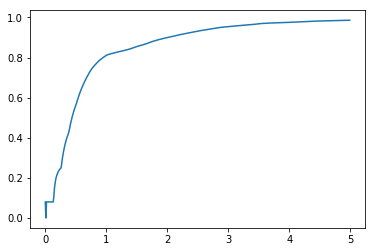

In [6]:
plt.plot(spline_x,spline_y_nue)

In [7]:
run_labs = ['run1_v12', 'run1_v13']
inputdir = './input/June/'

run_labs = ['run1_v12', 'run1_v16']

gr = 1.618
outdir= './output/xsec_v12v13/'
mass_mu = 0.106
mass_e = 0

In [15]:
sig = 'nu'
pdg_sig = 14
mass = mass_e

main_tree_name= 'pandoraSliceId'

lower = [-1.55, -115.53, 0.1]
upper = [254.8, 117.47, 1036.9]
fidvol_arr = [10,10,10,10,10,50] 



In [16]:
cols_event = ['run', 'subRun', 'event', 'evt_time_sec', 'evt_time_nsec', 'foundATargetSlice', 
              'nuMode', 'nuCCNC', 'nuEnergy', 'leptonEnergy', 'nuX', 'nuW', 'nuPt', 'nuTheta',
              'nuInteractionTime', 'nuPdgCode', 'nuVertexX', 'nuVertexY', 'nuVertexZ']

In [17]:
df_events = {}
df_pot = {}

for run_lab in run_labs:
    file_name = glob.glob(inputdir+run_lab+'/*'+sig+'_overlay*')[0]
    print(file_name)
    df_events[run_lab] = uproot.open(file_name)[main_tree_name]['events'].pandas.df(cols_event)
    df_pot[run_lab] = uproot.open(file_name)['nuCCAnalyser']['subruns'].pandas.df()

./input/June/run1_v12/NuCC_nu_overlay_v12.root
./input/June/run1_v16/NuCC_nu_overlay.root


In [18]:
pot_v12 = df_pot['run1_v12']['pot'].sum()
scales = {}
scales['run1_v12'] = 1
scales[run_labs[1]] = df_pot['run1_v12']['pot'].sum()/df_pot[run_labs[1]]['pot'].sum()

In [19]:
fields_arr = ['nuEnergy', 'leptonEnergy', 'nuTheta', 'nuX', 'nuW']
xmin_arr = [mass,mass, 0,0,mass]
xmax_arr = [3,3, np.pi,2,2]
bins_arr = [20,40,40,40,40]
xlab_arr = [r'$\nu$ Energy [GeV]', 'Lepton Energy [GeV]', r'Lepton $\theta$ Angle', 
            'Bjorken x scaling', 'Hadronic invariant mass (W) [GeV]']

[0.075      0.22500001 0.375      0.525      0.675      0.825
 0.97499996 1.125      1.2750001  1.425      1.575      1.7249999
 1.875      2.025      2.175      2.325      2.475      2.625
 2.775      2.925     ]
[0.69818699 0.18789128 0.38121628 0.54269092 0.68025116 0.74056253
 0.80655776 0.80489004 0.83198338 0.84826678 0.82778866 0.83354473
 0.86061381 0.87819424 0.92459184 0.83704212 1.03769759 0.96373677
 0.89572285 0.78426483]
[0.0375     0.1125     0.1875     0.2625     0.3375     0.4125
 0.48749998 0.5625     0.63750005 0.7125     0.7875     0.86249995
 0.9375     1.0125     1.0875     1.1625     1.2375     1.3125
 1.3875     1.4625     1.5375     1.6125     1.6875     1.7625
 1.8375     1.9125     1.9875001  2.0625     2.1374998  2.2125
 2.2875     2.3625002  2.4375     2.5124998  2.5875     2.6625
 2.7375002  2.8125     2.8874998  2.9625    ]
[       nan 0.60692716 0.62430476 0.6891028  0.775511   0.78156335
 0.79580242 0.78933536 0.76386404 0.78080909 0.77545255 0.76393466

/home/wouter/Binaries/miniconda3/envs/uprootenv/lib/python3.5/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in true_divide
/home/wouter/Binaries/miniconda3/envs/uprootenv/lib/python3.5/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide
/home/wouter/Binaries/miniconda3/envs/uprootenv/lib/python3.5/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide
/home/wouter/Binaries/miniconda3/envs/uprootenv/lib/python3.5/site-packages/numpy/lib/histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/wouter/Binaries/miniconda3/envs/uprootenv/lib/python3.5/site-packages/numpy/lib/histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


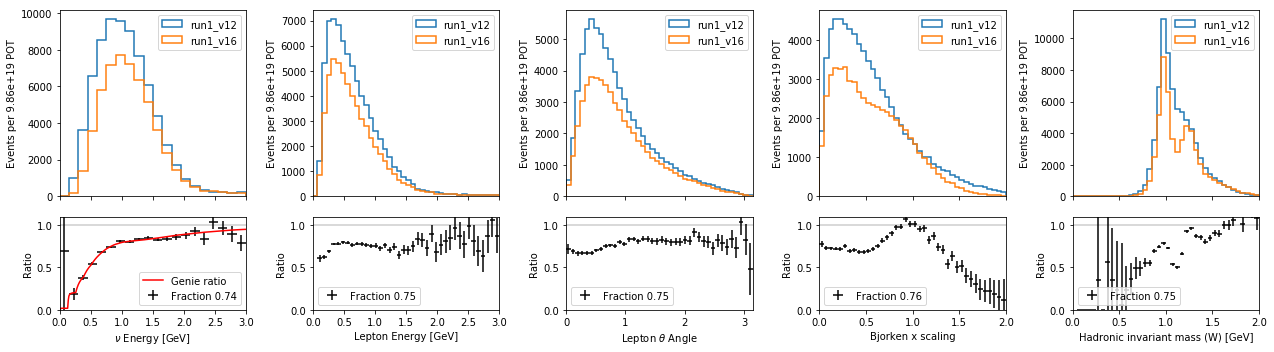

In [20]:
fig,ax=plt.subplots(ncols=5,nrows=2,figsize=(11*gr,5.), gridspec_kw = {'height_ratios':[2, 1]}, sharex='col')

ax[1][0].plot(spline_x, spline_y[sig], c='r', label='Genie ratio')

for i, (field,xmin,xmax,bins,xlab) in enumerate(zip(fields_arr, xmin_arr, xmax_arr, bins_arr, xlab_arr)):
    bin_vals = {}
    for run_lab in run_labs:
        data = df_events[run_lab].query('abs(nuPdgCode)==@pdg_sig & nuCCNC==0')[field]
        vals, edges, _ = ax[0][i].hist(data , label=run_lab, weights=[scales[run_lab]]*len(data),
                                       range=(xmin,xmax), bins=bins, 
                                       lw=1.5, histtype='step')
        bin_vals[run_lab] = vals
    ax[0][i].set_ylabel('Events per {:.3g} POT'.format(pot_v12))
    ax[0][i].legend()
    ax[0][i].set_xlim(xmin,xmax)
    #ratio
    ax[1][i].set_xlabel(xlab)
    ax[1][i].set_ylabel('Ratio')
    mids = (edges[1:]+edges[:-1])/2
    xerr = (edges[1:]-edges[:-1])/2
    yerr = np.sqrt(sum([scales[r]/bin_vals[r] for r in run_labs]))
    print(mids)
    fraq = sum(bin_vals[run_labs[1]])/sum(bin_vals['run1_v12'])
    print(bin_vals[run_labs[1]]/bin_vals['run1_v12'])
    ax[1][i].errorbar(mids, bin_vals[run_labs[1]]/bin_vals['run1_v12'], xerr = xerr, yerr=yerr, fmt='none', color='k',
                     label = 'Fraction {:.2f}'.format(fraq))
    ax[1][i].axhline(y=1, alpha=0.2, color='k')
    ax[1][i].set_ylim(0.0,1.1)
    ax[1][i].legend()
    
fig.tight_layout()
fig.savefig(outdir+"xsec_"+sig+".pdf", bbox_inches="tight")

/home/wouter/Binaries/miniconda3/envs/uprootenv/lib/python3.5/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in true_divide
/home/wouter/Binaries/miniconda3/envs/uprootenv/lib/python3.5/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in true_divide


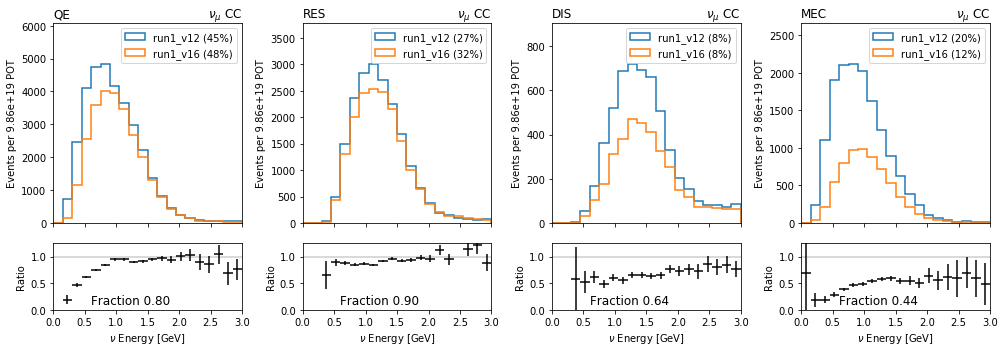

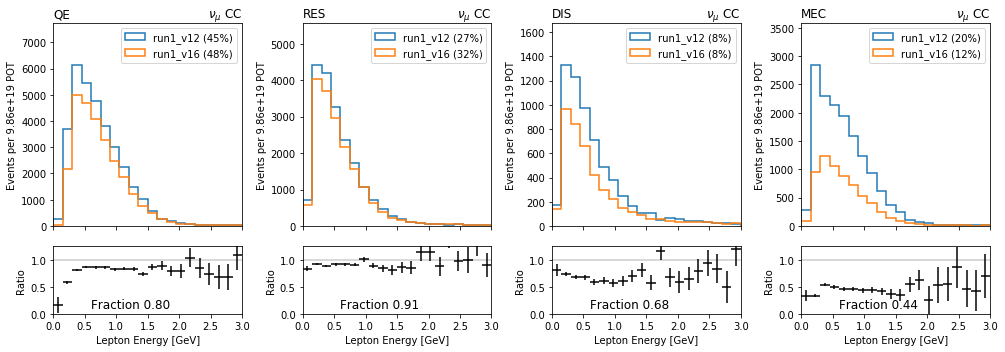

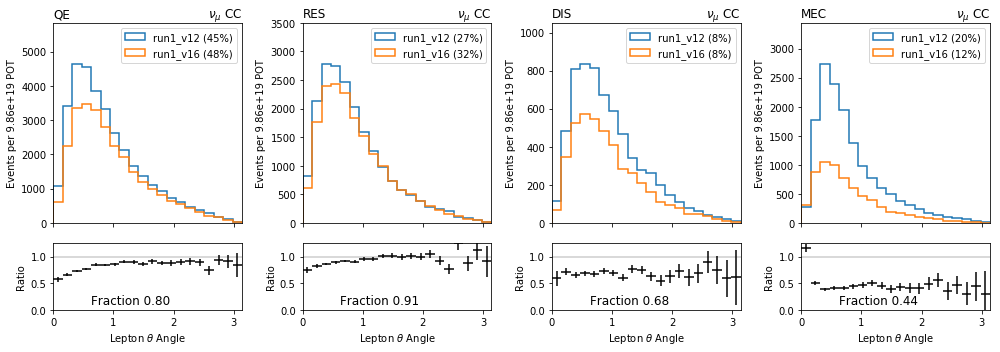

In [21]:
dict_modes = {0: 'QE', 1:'RES', 2:'DIS', 10:'MEC'}
bins_arr = [20,20,20]

for field,xmin,xmax,bins,xlab in zip(fields_arr, xmin_arr, xmax_arr, bins_arr, xlab_arr):
    fig,ax=plt.subplots(ncols=4,nrows=2,figsize=(14,5), gridspec_kw = {'height_ratios':[3, 1]}, sharex='col')
    for i,(int_code,name) in enumerate(dict_modes.items()):
        bin_vals = {}
        for run_lab in run_labs:
            data = df_events[run_lab].query('abs(nuPdgCode)==@pdg_sig & nuCCNC==0 & nuMode==@int_code')[field]
            percent = len(data)/sum(df_events[run_lab].eval('abs(nuPdgCode)==@pdg_sig & nuCCNC==0'))*100
            vals, edges, _ = ax[0][i].hist(data , label=run_lab+' ({:.0f}%)'.format(percent), weights=[scales[run_lab]]*len(data),
                                           range=(xmin,xmax), bins=bins, 
                                           lw=1.5, histtype='step')
            bin_vals[run_lab] = vals
        ax[0][i].set_ylabel('Events per {:.3g} POT'.format(pot_v12))
        ax[0][i].legend(ncol=1, loc='upper right')
        ax[0][i].set_title(name, loc="left")
        if pdg_sig==12:
            ax[0][i].set_title(r'$\nu_e$ CC', loc="right")
        if pdg_sig==14:
            ax[0][i].set_title(r'$\nu_\mu$ CC', loc="right")
        ax[0][i].set_xlim(xmin,xmax)
        ax[0][i].set_ylim(0,ax[0][i].get_ylim()[1]*1.2)

        #ratio
        ax[1][i].set_xlabel(xlab)
        ax[1][i].set_ylabel('Ratio')
        mids = (edges[1:]+edges[:-1])/2
        xerr = (edges[1:]-edges[:-1])/2
        yerr = np.sqrt(sum([scales[r]/bin_vals[r] for r in run_labs]))
        ax[1][i].errorbar(mids, bin_vals[run_labs[1]]/bin_vals['run1_v12'], xerr = xerr, yerr=yerr, fmt='none', color='k')
        ax[1][i].axhline(y=1, alpha=0.2, color='k')
        ax[1][i].set_ylim(0.0,1.25)
        text_x = xmin+(xmax-xmin)*0.2
        fraq = sum(bin_vals[run_labs[1]])/ sum(bin_vals['run1_v12'])
        ax[1][i].text(text_x, 0.1, 'Fraction {:.2f}'.format(fraq), fontsize=12)

    fig.tight_layout()
    fig.savefig(outdir+field+"_"+sig+"_xsec_zoom.pdf", bbox_inches="tight")